Part A

Import appropriate libraries

```
**# This is formatted as code**
```



Import the necessary library:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


Upload the file:

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

Saving compensation-a1.csv to compensation-a1.csv


Read the csv file into a dataframe

In [ ]:
df = pd.read_csv('compensation-a1.csv')


In [ ]:
# Display the first few rows of the DataFrame to verify the upload
print(df.head())

    Salaries  otherben  compensation
0  114473.16   9368.71     159436.65
1   84077.11   6931.91     120054.05
2    9980.17    835.11      13868.64
3    2873.41    222.46       3718.50
4    6701.85    538.43      10128.64


Describe your dataset

In [ ]:
print(df.describe())


            Salaries       otherben   compensation
count  291825.000000  291825.000000  291825.000000
mean    63210.172887    4644.276407   97901.982292
std     44660.462305    3787.907010   67777.549152
min    -68771.780000  -10636.500000  -74082.610000
25%     23281.920000    1587.190000   35817.450000
50%     62519.120000    4349.090000   98022.370000
75%     92910.710000    6829.480000  142058.420000
max    515101.800000   35157.630000  653498.150000


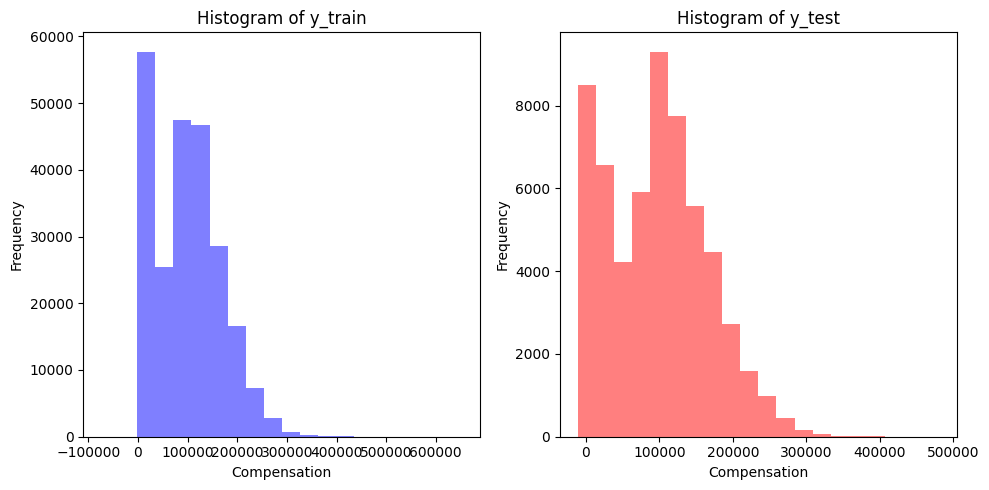

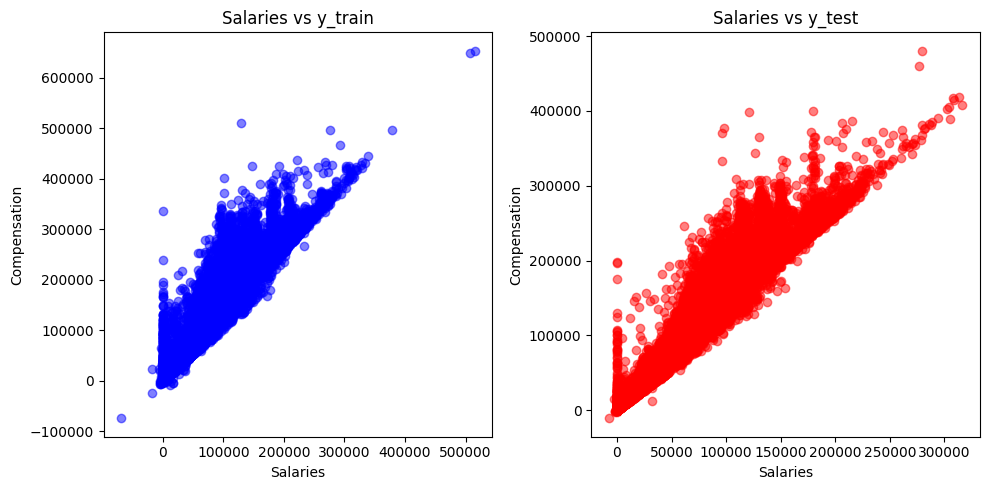

In [ ]:
import matplotlib.pyplot as plt

#  X_train, X_test, y_train, y_test are already defined

# Plot histograms for y_train and y_test
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(y_train, bins=20, color='blue', alpha=0.5)
plt.title('Histogram of y_train')
plt.xlabel('Compensation')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=20, color='red', alpha=0.5)
plt.title('Histogram of y_test')
plt.xlabel('Compensation')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


feature_name = X_train.columns[0] #  the first feature is the one you want to plot

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[feature_name], y_train, color='blue', alpha=0.5)
plt.title(f'{feature_name} vs y_train')
plt.xlabel(feature_name)
plt.ylabel('Compensation')

plt.subplot(1, 2, 2)
plt.scatter(X_test[feature_name], y_test, color='red', alpha=0.5)
plt.title(f'{feature_name} vs y_test')
plt.xlabel(feature_name)
plt.ylabel('Compensation')

plt.tight_layout()
plt.show()


Plot each input feature against the output feature/target

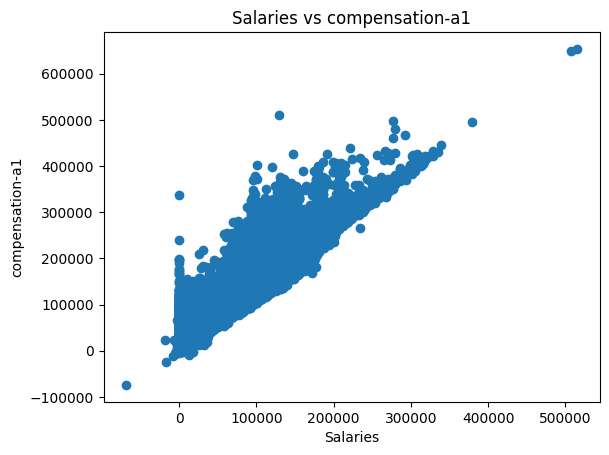

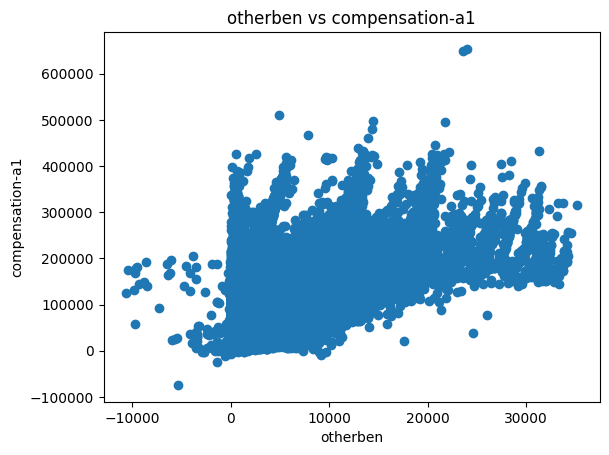

In [ ]:
for column in df.columns:
    if column != 'compensation':
        plt.scatter(df[column], df['compensation'])
        plt.xlabel(column)
        plt.ylabel('compensation-a1')
        plt.title(f'{column} vs compensation-a1')
        plt.show()


Define a separate dataframe X and y

In [ ]:
X = df.drop('compensation', axis=1)
y = df['compensation']


Split the dataset into training and testing partitions

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#  X and y are already defined as your features and target
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing partitions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets for both X and y
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (233460, 2)
X_test shape: (58365, 2)
y_train shape: (233460,)
y_test shape: (58365,)


In [ ]:
# Print the first few rows of the training and testing sets for both X and y
print("X_train:")
print(X_train.head())

print("X_test:")
print(X_test.head())

print("y_train:")
print(y_train.head())

print("y_test:")
print(y_test.head())


X_train:
         Salaries  otherben
267894   74278.22   7279.29
150934  216632.37   9352.66
100631   98595.87   8390.40
182488   82269.03   6863.95
1516     64954.76   5999.16
X_test:
         Salaries  otherben
261981  117421.99    358.58
104863   41058.00   3052.74
74156     2880.00    222.97
212795  116969.40   9721.38
181984   67719.40   5609.64
y_train:
267894    125046.20
150934    288687.84
100631    141607.83
182488    120085.18
1516       89282.69
Name: compensation, dtype: float64
y_test:
261981    154490.15
104863     60730.26
74156       3965.08
212795    153079.17
181984     99000.34
Name: compensation, dtype: float64


Create an instance of LinearRegression

In [ ]:
model = LinearRegression()


Call the fit method

In [ ]:
model.fit(X_train, y_train)


LinearRegression()

Predict the values for y_test and plot the true and predicted value

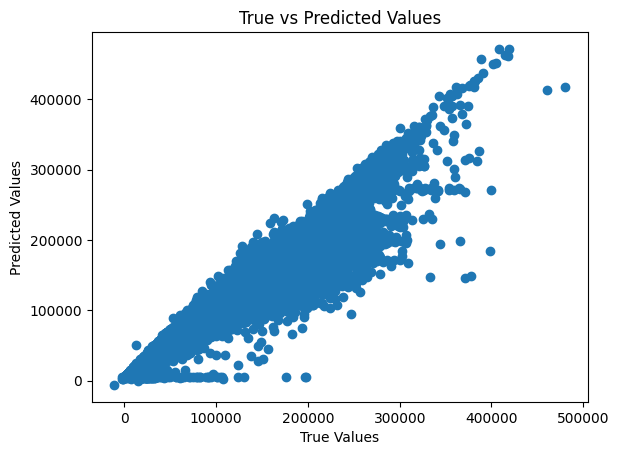

In [ ]:
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()


Print the score (r2)

In [ ]:
print(f'R^2 Score: {r2_score(y_test, y_pred)}')


R^2 Score: 0.9461601976224221


##** Part B**

Perform Kfold validation

In [ ]:
from sklearn.model_selection import cross_val_score

k_values = [3, 5, 10]

for k in k_values:
    scores = cross_val_score(model, X, y, cv=k, scoring='r2')
    print(f'K={k}, Cross-Validation Score: {scores.mean()}')


K=3, Cross-Validation Score: 0.9460804094850924
K=5, Cross-Validation Score: 0.9460782985700584
K=10, Cross-Validation Score: 0.9460769738259929
